## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#finalMouseData = study_results.set_index('Mouse ID').join(mouse_metadata.set_index('Mouse ID'), lsuffix='_prime', rsuffix='_secondary')
finalMouseData = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

pd.set_option("display.max_rows", None, "display.max_columns", None)
# Display the data table for preview
print(finalMouseData)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
5        b128         25           43.262145                 1    Capomulin   
6        b128         30           40.605335                 1    Capomulin   
7        b128         35           37.967644                 1    Capomulin   
8        b128         40           38.379726                 2    Capomulin   
9        b128         45           38.982878                 2    Capomulin   
10       f932          0           45.000000                 0     Ketapril   
11       g107          0           45.000000        

In [3]:
# Checking the number of mice.
finaDataMouseCount = len(finalMouseData['Mouse ID'].unique())

finaDataMouseCount

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseIds = finalMouseData[['Mouse ID', 'Timepoint']]
#print(finalMouseData[mouseIds.isin(mouseIds[mouseIds.duplicated(keep=False)])])
duplicateIds = finalMouseData[mouseIds.isin(mouseIds[mouseIds.duplicated(keep=False)])]
#duplicateMice = finalMouseData.duplicated(['Mouse ID', 'Timepoint'])

#print(duplicateIds[['Mouse ID', 'Timepoint']].dropna())
duplicateIds = duplicateIds[['Mouse ID', 'Timepoint']].dropna()
duplicateJustIds = duplicateIds['Mouse ID'].unique()

#duplicateFreeData = finalMouseData.drop_duplicates(keep=False, subset=['Mouse ID', 'Timepoint'])
#print(duplicateFreeData)
#print(duplicateJustIds)
#duplicatesDroppedMiceData = finalMouseData[~finalMouseData['Mouse ID'].isin(duplicateJustIds)]
#duplicateMiceData = finalMouseData[finalMouseData['Mouse ID'].isin(duplicateJustIds)]
#print(duplicatesDroppedMiceData)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = finalMouseData[finalMouseData['Mouse ID'].isin(duplicateJustIds)]


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicatesDroppedMiceData = finalMouseData[~finalMouseData['Mouse ID'].isin(duplicateJustIds)]

In [7]:
# Checking the number of mice in the clean DataFrame.
cleanMouseCount = len(duplicatesDroppedMiceData['Mouse ID'].unique())

print(cleanMouseCount)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumorMean = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumorMedian = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumorVar = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumorStd = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumorSem = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

combineStatsFrame = pd.concat([tumorMean, tumorMedian, tumorVar, tumorStd, tumorSem], 
                             axis = 1)

combineStatsFrame.columns = ['Tumor Mean', 'Tumor Median', 'Tumor Variance', 'Tumor Std.', 'Tumor Sem.']
combineStatsFrame

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std.,Tumor Sem.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
oneLineSummary = duplicatesDroppedMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'], axis="columns")

oneLineSummary.columns = ['Tumor Mean', 'Tumor Median', 'Tumor Variance', 'Tumor Std.', 'Tumor Sem.']

oneLineSummary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std.,Tumor Sem.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
miceCount = duplicatesDroppedMiceData.groupby('Drug Regimen')['Mouse ID'].nunique()

miceCount

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

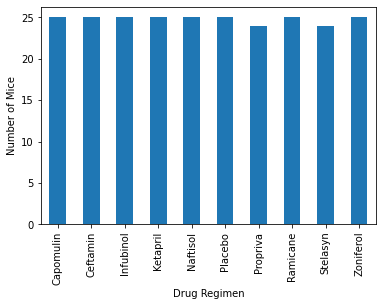

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
barMice = miceCount.plot.bar(x=miceCount.index, y=miceCount)

barMice.set_ylabel('Number of Mice')

<BarContainer object of 10 artists>

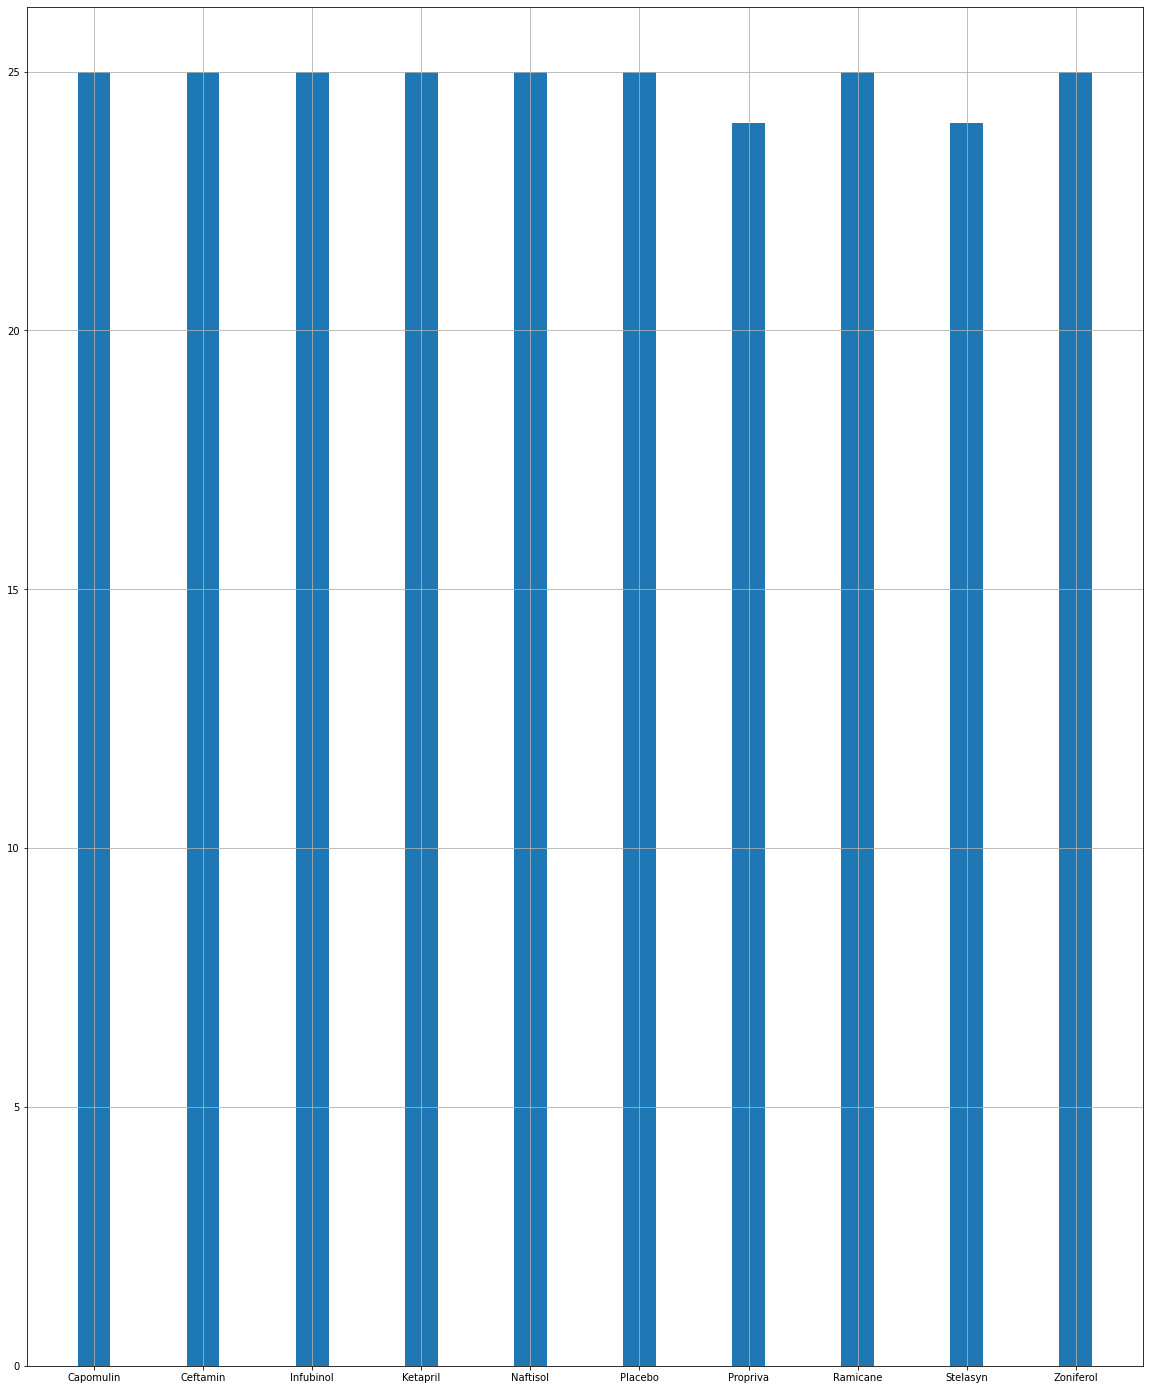

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(20, 25))
plt.grid(zorder=0)
plt.bar(miceCount.index, miceCount, width=0.3, align='center')

In [13]:
miceGender = duplicatesDroppedMiceData.groupby('Sex')['Mouse ID'].nunique()

miceGender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0, 0.5, '')

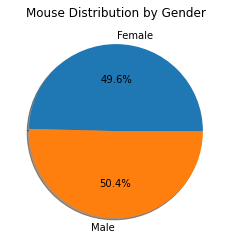

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

piePlot1 = miceGender.plot.pie(title='Mouse Distribution by Gender', autopct='%1.1f%%', shadow=True)
piePlot1.set_ylabel('')

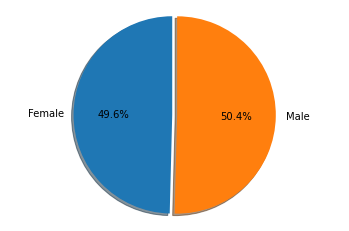

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
sizes = [miceGender[0], miceGender[1]]
explode = (0, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#finalTumorDF = duplicatesDroppedMiceData.groupby('Mouse ID').max()

#print(finalTumorDF)

finalTumorTimepoints = duplicatesDroppedMiceData.groupby('Mouse ID', as_index=False)['Timepoint'].max()

#print(finalTumorTimpoints)
#finalTumorDF
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
restrictedTumorData = duplicatesDroppedMiceData.merge(finalTumorTimepoints[['Mouse ID', 'Timepoint']])

restrictedTumorData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
5,h246,45,74.104086,2,Ketapril,Male,13,30
6,p189,45,75.294936,4,Ketapril,Male,8,28
7,n923,40,66.229606,3,Ketapril,Male,19,30
8,q119,10,51.236606,0,Ketapril,Male,17,30
9,f993,20,52.079510,1,Naftisol,Male,21,28


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = duplicatesDroppedMiceData['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tummorVolList = []
outlier_datapoints = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1 = restrictedTumorData['Tumor Volume (mm3)'].quantile(0.25)
q3 = restrictedTumorData['Tumor Volume (mm3)'].quantile(0.75)
iqr = q3 - q1

print(q3)
print(q1)
 
#iqr
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatmentList:
    tumorSubList = []
    
    for index, row in restrictedTumorData.iterrows():
        if row['Drug Regimen'] == drug:
            tumorVol = row['Tumor Volume (mm3)']
            tumorSubList.append(tumorVol)
            if tumorVol > (q3 + 1.5 * iqr) or tumorVol < (q1 - 1.5 * iqr):
                outlier_datapoints.append(tumorVol)
# add subset
    print(len(tumorSubList))
    tummorVolList.append(tumorSubList)
    
# Determine outliers using upper and lower bounds
print(outlier_datapoints) 

if len(outlier_datapoints) == 0:
    print('No outliers detected')
else:
    print('Possible outliers detected')

65.05362410500001
45.87586684749999
25
25
25
25
24
25
25
24
25
25
[]
No outliers detected


{'whiskers': [<matplotlib.lines.Line2D at 0x193f9b6e6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x193f9b6edd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x193f9b6e3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x193f9b79518>],
 'fliers': [<matplotlib.lines.Line2D at 0x193f9b79898>],
 'means': []}

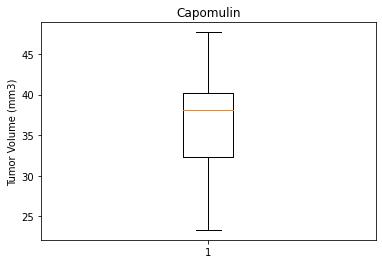

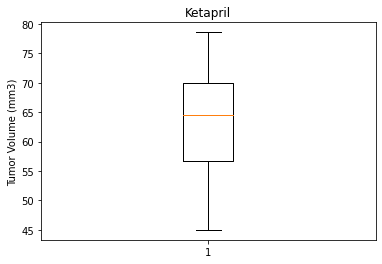

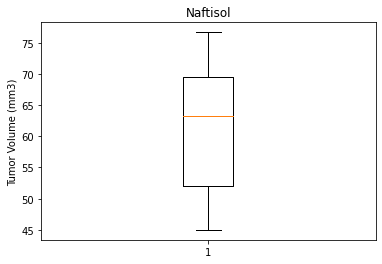

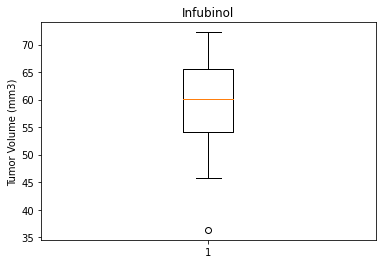

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig2, ax2 = plt.subplots()
ax2.set_title(treatmentList[0])
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(tummorVolList[0])

fig3, ax3 = plt.subplots()
ax3.set_title(treatmentList[1])
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(tummorVolList[1])

fig4, ax4 = plt.subplots()
ax4.set_title(treatmentList[2])
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(tummorVolList[2])

fig5, ax5 = plt.subplots()
ax5.set_title(treatmentList[3])
ax5.set_ylabel('Tumor Volume (mm3)')
ax5.boxplot(tummorVolList[3])

## Line and Scatter Plots

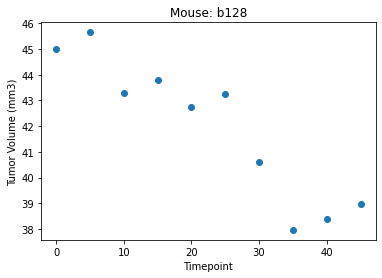

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinMice = duplicatesDroppedMiceData.loc[duplicatesDroppedMiceData['Drug Regimen'] == 'Capomulin']

singleCapoMouse = capomulinMice.loc[capomulinMice['Mouse ID'] == capomulinMice['Mouse ID'][0]]

plt.scatter(singleCapoMouse['Timepoint'], singleCapoMouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse: ' + singleCapoMouse['Mouse ID'][0])
plt.show()

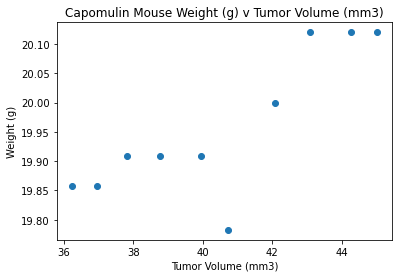

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
averageCapoVolume = capomulinMice.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
averageCapoWeight = capomulinMice.groupby('Timepoint')['Weight (g)'].mean()

plt.scatter(averageCapoVolume, averageCapoWeight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title('Capomulin Mouse Weight (g) v Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
